# coba sendiri liat google

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt

code yang masuk ke flask

In [2]:
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')
soup = BeautifulSoup(url_get.content,"html.parser")
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

percobaan subset 1 movie

In [3]:
lister = soup.find_all('div', attrs={'class':'lister-item-content'})
print(type(lister))
print(len(lister))

<class 'bs4.element.ResultSet'>
50


In [5]:
judul = lister[1].h3.a.text
judul

'The Mandalorian'

In [6]:
rating = float(lister[1].strong.text)
rating

8.7

In [7]:
metascore = lister[1].find('div', attrs={'class':'ratings-metascore'})
type(metascore)

NoneType

In [8]:
votes = int(lister[1].find('span', attrs={'name':'nv'})['data-value'])
votes

166306

code yang mau masuk ke flask

In [3]:
lister = soup.find_all('div', attrs={'class':'lister-item-content'})
print(type(lister))
print(len(lister))

<class 'bs4.element.ResultSet'>
50


In [4]:
# buat cangkang
titles = []
imdb_ratings = []
metascores = []
votes = []

# ambil data per movie
for onelist in lister:
    
# berpatok ke metascore
# kalau metascore ga none berarti isi masing2 kolom seperti apa?
    if onelist.find('div', class_ = 'inline-block ratings-metascore') is not None:
        
        # judul
        title = onelist.h3.a.text
        titles.append(title)
        
        # imdb rating
        ratings = float(onelist.strong.text)
        imdb_ratings.append(ratings)
        
        # metascore
        mscore = onelist.find('div', attrs={'class':'inline-block ratings-metascore'}).span.text
        metascores.append(int(mscore))
        
        # votes
        vote = onelist.find('span', attrs={'name':'nv'})['data-value']
        votes.append(int(vote))

# kalau metascore none berarti isi masing2 kolom seperti apa?
    if onelist.find('div', class_ = 'inline-block ratings-metascore') is None:
        
        # judul
        title = onelist.h3.a.text
        titles.append(title)
        
        # imdb rating
        ratings = float(onelist.strong.text)
        imdb_ratings.append(ratings)
        
        # metascore
        mscore = 0
        metascores.append(int(mscore))
        
        # votes
        vote = onelist.find('span', attrs={'name':'nv'})['data-value']
        votes.append(int(vote))
        
# dari cangkang yang dah dibuat disusun jadi df
df = pd.DataFrame({
'film_title': titles,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(df.info()) #cek data type
print()
print(df[df['metascore']==0].count()) #secara manual dihitung ada 15 film yg ga ada metascorenya
print()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   film_title  50 non-null     object 
 1   imdb        50 non-null     float64
 2   metascore   50 non-null     int64  
 3   votes       50 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ KB
None

film_title    17
imdb          17
metascore     17
votes         17
dtype: int64



,film_title,imdb,metascore,votes
0,Star Wars: Episode IX - The Rise of Skywalker,6.7,53,317942
1,The Mandalorian,8.7,0,166306
2,After Life,8.5,0,66296
3,Dead to Me,8.1,0,36213
4,Once Upon a Time... in Hollywood,7.7,83,460971
5,The Gentlemen,7.9,51,129035
6,Gisaengchung,8.6,96,399841
7,Bad Education,7.2,79,11540
8,The Lodge,6.1,64,11361
9,El hoyo,7.0,73,116415


In [5]:
# Buatlah plot dari 7 film paling populer di tahun 2019.

df = df[(df['imdb']>7)&(df['metascore']>70)].sort_values('votes', ascending=False)
df.head(7)

,film_title,imdb,metascore,votes
12,Avengers: Endgame,8.4,78,713437
4,Once Upon a Time... in Hollywood,7.7,83,460971
6,Gisaengchung,8.6,96,399841
11,1917,8.3,78,303941
10,Knives Out,7.9,82,297156
34,The Irishman,7.9,94,287093
33,Ford v Ferrari,8.1,81,212094


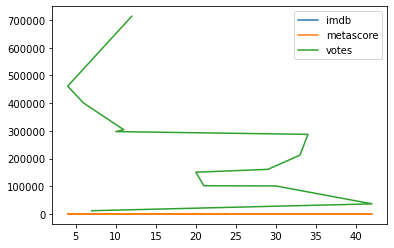

In [6]:
df.plot()

In [7]:
titles = []
imdb_ratings = []
metascores = []
votes = []

# ambil data per movie
for onelist in lister:

    if onelist.find('div', class_ = 'inline-block ratings-metascore') is None:
        
        # judul
        title = onelist.h3.a.text
        titles.append(title)
        
        # imdb rating
        ratings = float(onelist.strong.text)
        imdb_ratings.append(ratings)
        
        # metascore
        mscore = 0
        metascores.append(int(mscore))
        
        # votes
        vote = onelist.find('span', attrs={'name':'nv'})['data-value']
        votes.append(int(vote))
        
df = pd.DataFrame({
'film_title': titles,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(df.info()) #cek data type
print()
print(df[df['metascore']==0].count()) #buat cek jumlah film dgn metascore kosong berapa banyak
print()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   film_title  17 non-null     object 
 1   imdb        17 non-null     float64
 2   metascore   17 non-null     int64  
 3   votes       17 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 672.0+ bytes
None

film_title    17
imdb          17
metascore     17
votes         17
dtype: int64



,film_title,imdb,metascore,votes
0,The Mandalorian,8.7,0,166306
1,After Life,8.5,0,66296
2,Dead to Me,8.1,0,36213
3,Reckoning,6.5,0,456
4,What We Do in the Shadows,8.4,0,22185
5,The Witcher,8.3,0,252058
6,Chernobyl,9.4,0,459137
7,The Boys,8.7,0,143328
8,NOS4A2,6.7,0,5406
9,Sex Education,8.3,0,131324


---

# code dari website

code dari website langsung

In [90]:
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')
html_soup = BeautifulSoup(url_get.content,"html.parser")
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [92]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name = container.h3.a.text
        names.append(name)
# The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
# The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
# The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
# The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      33 non-null     object 
 1   year       33 non-null     object 
 2   imdb       33 non-null     float64
 3   metascore  33 non-null     int64  
 4   votes      33 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ KB
None


,movie,year,imdb,metascore,votes
0,Star Wars: Episode IX - The Rise of Skywalker,(2019),6.7,53,317828
1,Once Upon a Time... in Hollywood,(2019),7.7,83,460855
2,The Gentlemen,(2019),7.9,51,128949
3,Gisaengchung,(2019),8.6,96,399687
4,Bad Education,(2019),7.2,79,11485
5,The Lodge,(2019),6.1,64,11287
6,El hoyo,(2019),7.0,73,116306
7,Knives Out,(2019),7.9,82,297033
8,1917,(2019),8.3,78,303807
9,Avengers: Endgame,(2019),8.4,78,713373


# Coba buat flask

In [ ]:
from flask import Flask, render_template 
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from io import BytesIO
import base64
import matplotlib.pyplot as plt

app = Flask(__name__)

def scrap(url):
    #This is fuction for scrapping
    url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')
    soup = BeautifulSoup(url_get.content,"html.parser")
    lister = soup.find_all('div', attrs={'class':'lister-item-content'})
    
    #Find the key to get the information
    # buat cangkang
    titles = []
    imdb_ratings = []
    metascores = []
    votes = []

    # ambil data per movie
    for onelist in lister:
    
        # berpatok ke metascore
        # kalau metascore ga none berarti isi masing2 kolom seperti apa?
        if onelist.find('div', class_ = 'inline-block ratings-metascore') is not None:
        
            # judul
            title = onelist.h3.a.text
            titles.append(title)
        
            # imdb rating
            ratings = float(onelist.strong.text)
            imdb_ratings.append(ratings)
        
            # metascore
            mscore = onelist.find('div', attrs={'class':'inline-block ratings-metascore'}).span.text
            metascores.append(int(mscore))
        
            # votes
            vote = onelist.find('span', attrs={'name':'nv'})['data-value']
            votes.append(int(vote))

        # kalau metascore none berarti isi masing2 kolom seperti apa?
        if onelist.find('div', class_ = 'inline-block ratings-metascore') is None:
        
            # judul
            title = onelist.h3.a.text
            titles.append(title)
        
            # imdb rating
            ratings = float(onelist.strong.text)
            imdb_ratings.append(ratings)
        
            # metascore
            mscore = 0
            metascores.append(int(mscore))
        
            # votes
            vote = onelist.find('span', attrs={'name':'nv'})['data-value']
            votes.append(int(vote))
        
    # dari cangkang yang dah dibuat disusun jadi df
    df = pd.DataFrame({
    'film_title': titles,
    'imdb': imdb_ratings,
    'metascore': metascores,
    'votes': votes
    })
    
    df = df[(df['imdb']>7)&(df['metascore']>70)].sort_values('votes', ascending=False).head(7)

    return df

@app.route("/")
def index():
    df = scrap('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31') #insert url here

    #This part for rendering matplotlib
    fig = plt.figure(figsize=(5,2),dpi=300)
    df.plot()
    
    #Do not change this part
    plt.savefig('plot1',bbox_inches="tight") 
    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result = str(figdata_png)[2:-1]
    #This part for rendering matplotlib

    #this is for rendering the table
    df = df.to_html(classes=["table table-bordered table-striped table-dark table-condensed"])

    return render_template("index_copy1.html", table=df, result=result)


if __name__ == "__main__": 
    app.run()